In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [16]:
class PSO():
	# PSO參數設置
    def __init__(self, pN, dim, max_iter):
        self.w = 0.8
        self.c1 = 2
        self.c2 = 2
        self.r1 = 0.6
        self.r2 = 0.3
        self.pN = pN  # 粒子數量
        self.dim = dim  # 搜索維度
        self.max_iter = max_iter  # 迭代次數
        self.X = np.zeros((self.pN, self.dim))  # 所有粒子的位置和速度
        self.V = np.zeros((self.pN, self.dim))
        self.pbest = np.zeros((self.pN, self.dim))  # 個體經歷的最佳位置和全局最佳位置
        self.gbest = np.zeros((1, self.dim))
        self.p_fit = np.zeros(self.pN)  # 每個個體的歷史最佳適應值
        self.fit = 1e10  # 全局最佳適應值
 
    #目標函数 Sphere函数
    def function(self, X):
        return X**8-2*X+9
        #return X**4-2*X+3
        #return X**2-4*X+4
 
    #初始化群體
    def init_Population(self):
        for i in range(self.pN):      #因為要隨機生成pN個數據，所以需要循環pN次
            for j in range(self.dim):      #每一個維度都需要生成速度和位置，故循環dim次
                self.X[i][j] = random.uniform(0, 1)
                self.V[i][j] = random.uniform(0, 1)
            self.pbest[i] = self.X[i]     #给self.pbest定值
            tmp = self.function(self.X[i])  #得到當前最優
            self.p_fit[i] = tmp    #這個個體歷史最佳的位置
            if tmp < self.fit:   #得到現在最優和歷史最優比大小，如果現在最優大於歷史最優，則更新歷史最優
                self.fit = tmp
                self.gbest = self.X[i]
 
    # 更新粒子位置
    def iterator(self):
        fitness = []
        for t in range(self.max_iter):    #迭代次数
            for i in range(self.pN):  # 更新gbest\pbest
                temp = self.function(self.X[i])
                if temp < self.p_fit[i]:  # 更新個體最優
                    self.p_fit[i] = temp
                    self.pbest[i] = self.X[i]
                    if self.p_fit[i] < self.fit:  # 更新全局最優
                        self.gbest = self.X[i]
                        self.fit = self.p_fit[i]
            for i in range(self.pN):
                self.V[i] = self.w * self.V[i] + self.c1 * self.r1 * (self.pbest[i] - self.X[i]) + \
                            self.c2 * self.r2 * (self.gbest - self.X[i])
                self.X[i] = self.X[i] + self.V[i]
            fitness.append(self.fit)
            print(self.X[0], end=" ")
            print(self.fit)  # 输出最優值
        return fitness

[1.19329085] [7.56475771]
[0.62048712] [7.56475771]
[0.28001642] 7.564520404788113
[0.43615163] 7.564520404788113
[0.8293713] 7.564520404788113
[1.26931622] 7.564520404788113
[1.04658125] 7.564520404788113
[0.4983761] 7.564520404788113
[0.48534195] 7.564520404788113
[0.96617215] 7.564520404788113
[1.15493683] 7.564520404788113
[0.84346222] 7.564520404788113
[0.56259193] 7.564432485222765
[0.66732858] 7.564432485222765
[0.94980203] 7.564432485222765
[1.01623347] 7.564432485222765
[0.83416539] 7.564432485222765
[0.68719005] 7.564432485222765
[0.74141784] 7.564432485222765
[0.9385255] 7.564429541349256
[0.93518707] 7.564429541349256
[0.73614546] 7.56441859831254
[0.73962948] 7.5644157488003785
[0.89317921] 7.5644157488003785
[0.89266542] 7.5644157488003785
[0.77294445] 7.564413166923898
[0.75622987] 7.564413166923898
[0.85885689] 7.564413166923898
[0.89003919] 7.564413166923898
[0.81314376] 7.564413166923898
[0.75760008] 7.564413166923898
[0.80827659] 7.564413166923898
[0.85510748] 7.5644

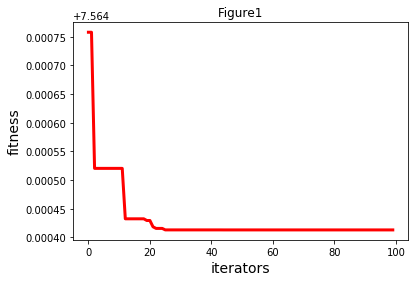

In [17]:
#執行
my_pso = PSO(pN=30, dim=1, max_iter=100)
my_pso.init_Population()
fitness = my_pso.iterator()

# 畫圖
plt.figure(1)
plt.title("Figure1")
plt.xlabel("iterators", size=14)
plt.ylabel("fitness", size=14)
t = np.array([t for t in range(0, 100)])
fitness = np.array(fitness)
plt.plot(t, fitness, color='r', linewidth=3)
plt.show()
